Welcome to **Implementing Your First Steps lab**. 

Now that you have generated the step stubs in the previous lab, it is time to implement them.

In this lab, you're going to replace the `NotImplementedError` exceptions with real code.

# Learning Objectives

After completing this lab, you will be able to:
* Make calls to implement the steps in a test.
* Write code to make the tests pass.

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository:
```
git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git
```

## Change into the Repo Folder

Finally, you should switch to the directory that contains the lab files:
```
cd /home/project/duwjx-tdd_bdd_PracticeCode
```

## Install Lab Dependencies

Once you have cloned the repository, you need to install some prerequisite software into the development environment:
```
bash ./bin/setup.sh
```

## Change into the Lab Folder

Next, you should switch to the directory that contains the lab files:
```
cd /home/project/duwjx-tdd_bdd_PracticeCode/labs/12_implementing_steps
```

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab:
```
pip install -r requirements.txt
```
You are now ready to start the lab.

# Navigate to the Code

In the IDE, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/12_implementing_steps` folder. 

This folder contains all the source code that you will use for this lab.

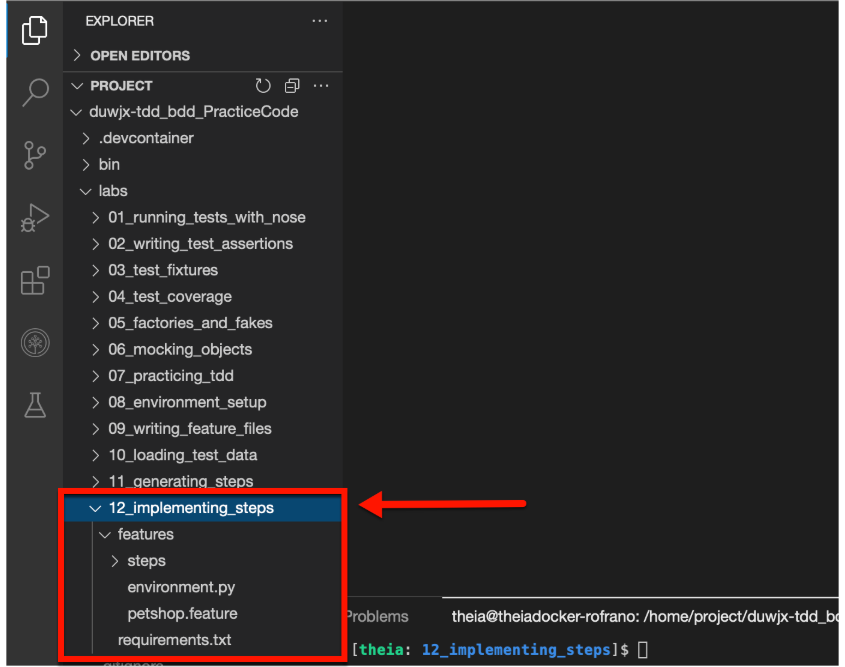

# The User Interface

Below is the User Interface that you will be testing with Selenium and Behave in this lab:

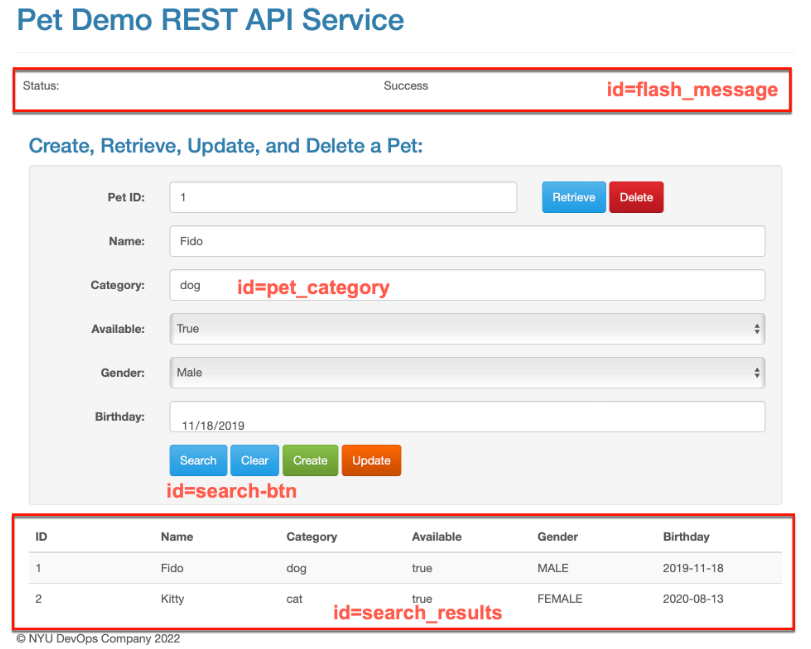

The image has been annotated to show the following:

* The web site you are testing uses a consistent naming convention for the `id` attribute of each HTML element that needs to be manipulated. They all start with the prefix `pet_` followed by the lowercase name of the element. For example the Category element has an `id` of `pet_category`.

* The website under test uses the following naming convention for creating the `id=` attribute on buttons. It uses the lowercase text from the button, with the suffix `-btn`. For example, the **Search** button has an `id` of `search-btn` and the **Create** button has an `id` of `create-btn`, etc.

* There are two special id's that are `flash_message` and `search_results`. The `flash_message` area holds any messages coming back from the actions you perform. The `search_results` area contains a table of data that is returned from clicking the **Search** button.

# Selenium Changes

> **Important Notice**
> 
> From the time that the video lectures were created until now, the Python **Selenium** package has seen many new releases and a major upgrade from `3.141.0` to `4.19.0`. During this time, the API taught in the video lecture `find_element_by_id(element_id)` has been deprecated and now removed. The equivalent API is now: `find_element(By.ID, element_id)`. These lab instructions and sample code have been changed to the new syntax.

This is the code change that you need to utilize in this lab which differs from the video:

##  Old Code

```
context.driver.find_element_by_id(element_id)
```

## New Code

You must import the Selenium `By` class like this:
```
from selenium.webdriver.common.by import By
```

Then whenever you need to **find an element by id**, you need to call `find_element()` passing on `By.ID` as the first paramater like this:
```
context.driver.find_element(By.ID, element_id)
```
The hints and suggestion in this lab will remind you of the new code syntax. 

We just want you to be aware that the code in the lab no longer matches the code presented in the video, but the concepts are `100%` the same, it was just a syntax change.

# Start: Run Behave

In the last lab, you created the function stubs for steps that need to be implemented. 

In this lab, you will add the implementations.

Let's start by running the `behave` command and see which step is failing so that we can implement it.

## Your Task

Use **`Terminal -> New Terminal`**, to open a bash shell and and run the `behave` command.

The output should look like this:

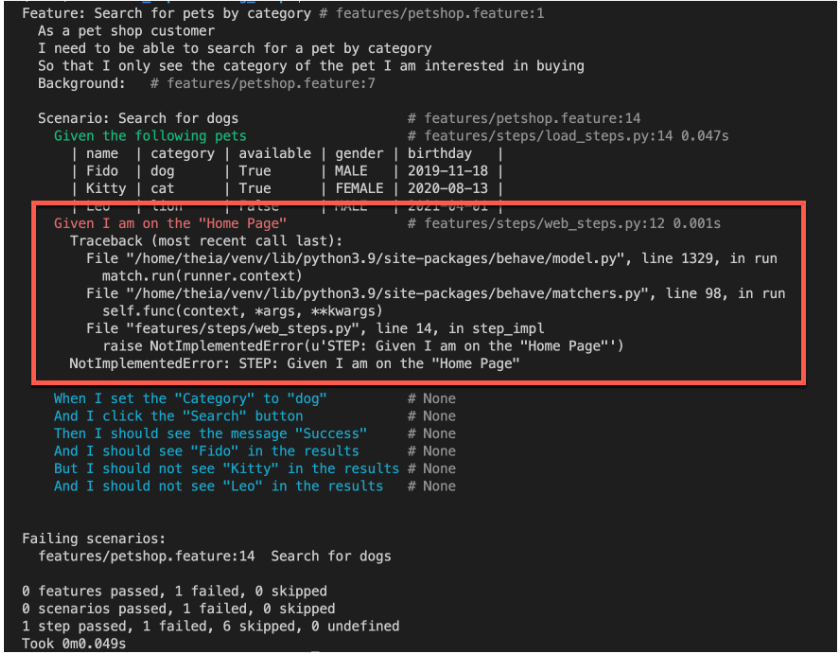

As you can see the failing step is Given I am on the **“Home Page”** which can be found on **line 12** of `features/steps/web_steps.py`.

Let's implement that now.

# Step 1: Given I am on the Home Page

Open the `features/steps/web_steps.py` file in the IDE editor. 

You will work in this file for the remainder of the lab.

The first task is to implement the step for **‘Given I am on the “Home Page”'**. 

The step currently is just the function stub you see below:
```
@given('I am on the "Home Page"')
def step_impl(context):
    raise NotImplementedError(u'STEP: Given I am on the "Home Page"')
```
This step should call the root URL (`/`) of the service to place you on the home page as a starting point for the scenario.

## Background

Here is some important background information that will help you implement the solution:

Remember that in `environment.py` we set a variable in the context named: `context.base_url` that contains the base URL of the service under test.
Also it is important to know that you can make an HTTP `GET` request on the web driver with a call to `context.driver.get()`.

**Example:**
```
context.driver.get("http://www.website.com")
```
Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Use `context.driver.get()` pass in the `context.base_url` as an argument and save the response in `context.response` to replace the current line of code.**
```
    {the response} = context.driver.get(...place the base url here...)
```
**Save your work**

## Solution

```
@given('I am on the "Home Page"')
def step_impl(context):
    context.response = context.driver.get(context.base_url)
```

## Results

Run `behave`.

You should see **Given I am on the “Home Page”** is now `green` and **When I set the “Category” to “dog”** is now `red`.

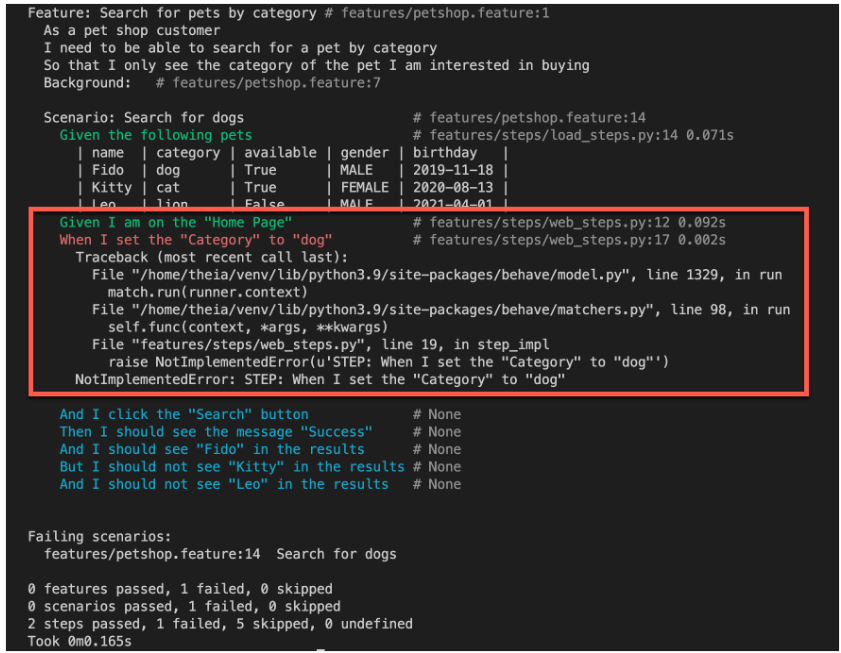

Let's go and implement the next red step.

# Step 2: When I set the Category to dog

The next step that is red is **When I set the Category to “dog”**. 

If you look in the `web_steps.py` file you will see that it currently looks like this:
```
@when('I set the "Category" to "dog"')
def step_impl(context):
    raise NotImplementedError(u'STEP: When I set the "Category" to "dog"')
```
The next step should get the element named `pet_category`, clear it, and type the word **“dog”** into the field.

## Background

Here is some important background information that will help you implement the solution:

* The web site you are testing uses a consistent naming convention for the `id` attribute of each HTML element that needs to be manipulated. They all start with the prefix `pet_` followed by the lowercase name of the element. For example the Category element has an `id` of `pet_category`.

* With Selenium, one way to find elements on a web page is to address them by their `id=` attribute. The Selenium call to do this is: `find_element(By.ID)`.

    ```
        element = context.driver.find_element(By.ID, '...element name here...')
    ```


* To clear a web element of any data, you can use the `clear()` function on that element.

    ```
        element.clear()
    ```


* You can type data into an entry field element using the `send_keys()` function on that element.

    ```
        element.send_keys('...text string here...')
    ```

Use this information to help you implement the step.

## Your Task

Write code that implements the following:

Make a call to `context.driver.find_element(By.ID)` pass in `'pet_category'` and store the results in a variable called `element` to represent the web element.
```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

Use the `element` from the previous line, make a call to the `clear()` function to remove any data from it.
```
    element.{function_call_name_here}()
```

Again using the same element from the previous line, make a call to the `send_keys()` passing in the string **“dog”**.
```
    element.send_keys(...place string to send here...)
```

Save your work

## Solution

```
@when('I set the "Category" to "dog"')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'pet_category')
    element.clear()
    element.send_keys('dog')
```

## Results

Run `behave`.

You should see **When I set the “Category” to “dog”** is now `green` and **And I click the “Search” button** is now `red`.

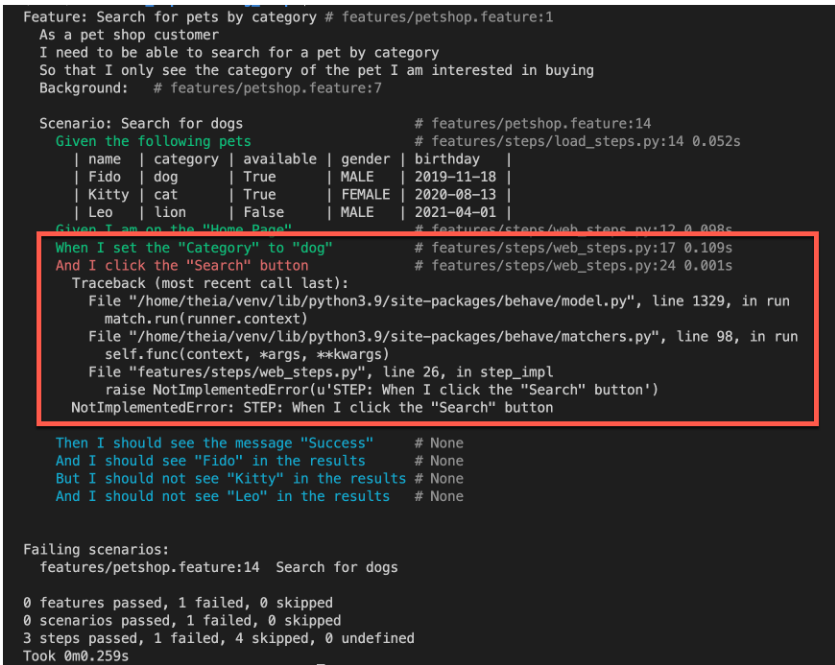

Let's go implement the next red step.

# Step 3: And I click the Search button

The next step that is red is **And I click the Search button**. 

If you look in the `web_steps.py` file you will see that it currently looks like this:

```
@when('I click the "Search" button')
def step_impl(context):
    raise NotImplementedError(u'STEP: When I click the "Search" button')
```

Notice that the decorator is `@when()` and not `@and()`. 

That's because the keywords And and But take on the meaning of the previous `Given`, `When`, or `Then`. 

Since the previous statement was a `When`, we use the `@when()` decorator.

## Background

Here is some important background information that will help you implement the solution:

The website under test uses the following naming convention for creating the `id=` attribute on buttons. It uses the lowercase text from the button, with the suffix `-btn`. For example, the **Search** button has an `id` of `search-btn`.

As you previously saw with **Selenium**, one way to find elements on a web page is to address them by their `id=` attribute. The Selenium call to do this is: `find_element(By.ID, )`
```
    element = context.driver.find_element(By.ID, '...element name here...')
```

To click a web element that is a button or hyper-text link, you can use the `click()` function on that element.
```
    element.click()
```

Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Make a call to `context.driver.find_element(By.ID)` pass in `'search-btn'` and store the results in a variable called `element` to represent the web element.**

```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

**Use the element from the previous line, make a call to the `click()` function to simulate clicking on the button.**
```
    element.{function_call_name_here}()
```

**Save your work**

## Solution

```
@when('I click the "Search" button')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search-btn')
    element.click()
```

## Results

Run `behave`.

You should see **And I click the “Search” button** is now `green` and **Then I should see the message “Success”** is now `red`.

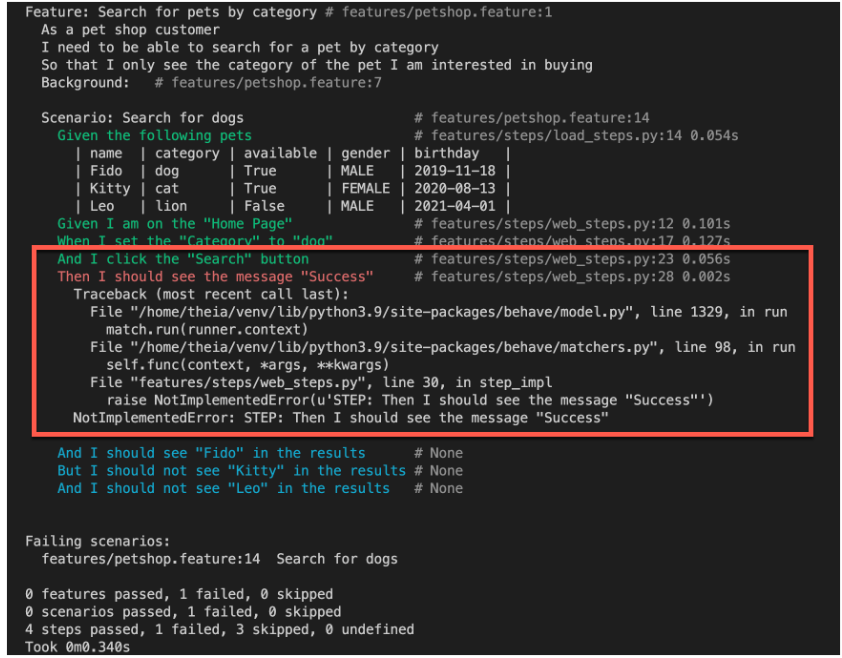

Let's go implement the next red step.

# Step 4: I should see the message Success

The next step that is red is **Then I should see the message “Success”**. If you look in the `web_steps.py` file you will see that it currently looks like this:

```
@then('I should see the message "Success"')
def step_impl(context):
    raise NotImplementedError(u'STEP: Then I should see the message "Success"')
```

## Background

Here is some important background information that will help you implement the solution:

The website under test writes all of it's messages to an element with an `id` of `flash_message`.

As you previously saw with Selenium, one way to find elements on a web page is to address them by their `id=` attribute. The Selenium call to do this is: `find_element(By.ID)`
```
    element = context.driver.find_element(By.ID, '...element name here...')
```

You can read the text of the message element by checking the `text` attribute.
```
    element.text
```
Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Make a call to `context.driver.find_element(By.ID)` pass in `'flash_message'` and store the results in a variable called element to represent the web `element`.**
```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

**Use the `element` from the previous line, `assert` that the `text` attribute contains the word **"Success"**.**
```
    assert {some value} in {text of element}
```

**Save your work**

## Solution

```
@then('I should see the message "Success"')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'flash_message')
    assert "Success" in element.text
```

## Results

Run `behave`.

You should see **Then I should see the message “Success”** is now `green` and **Then I should see “Fido”** in the results is now `red`.

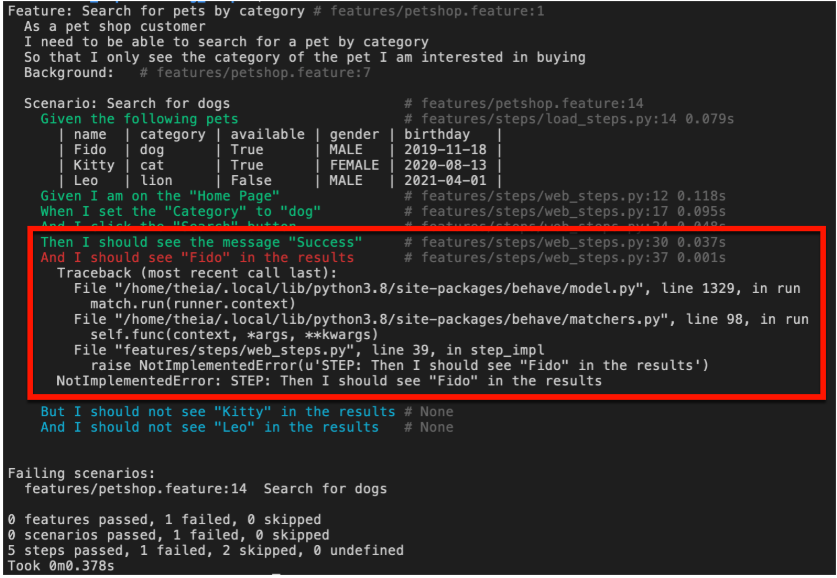

Let's go implement the next red step.

# Step 5: And I should see Fido in the results

The next step that is red is **And I should see “Fido” in the results**. If you look in the `web_steps.py` file you will see that it currently looks like this:
```
@then('I should see "Fido" in the results')
def step_impl(context):
    raise NotImplementedError(u'STEP: Then I should see "Fido" in the results')
```

## Background

Here is some important background information that will help you implement the solution:

The website under test writes all of the search results into an element with an `id` of `search_results`.

As you previously saw with Selenium, one way to find elements on a web page is to address them by their `id=` attribute. 

The Selenium call to do this is: `find_element(By.ID)`
```
    element = context.driver.find_element(By.ID, '...element name here...')
```

You can read the text of the the search results element by checking the `text` attribute.

```
    element.text
```

Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Make a call to `context.driver.find_element(By.ID)` pass in `'search_results'` and store the results in a variable called `element` to represent the web element.**
```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

**Use the element from the previous line, `assert` that the `text` attribute contains the word `"Fido"`.**
```
    assert {some value} in {text of element}
```

**Save your work**

## Solution

```
@then('I should see "Fido" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Fido" in element.text
```

## Results

Run `behave`.

You should see **Then I should see “Fido” in the results** is now `green` and **But I should not see “Kitty” in the results** is now `red`.

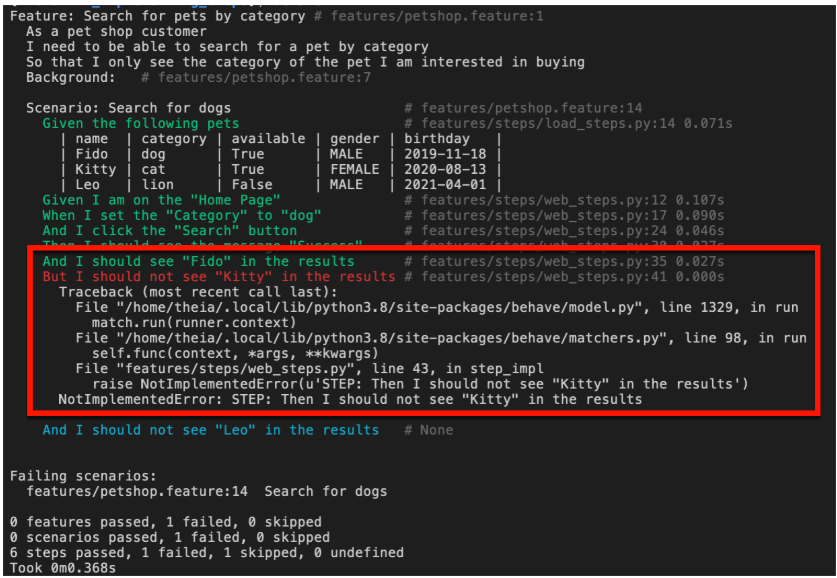

Let's go implement the next red step.

# Step 6: But I should not see Kitty in the results

The next step that is red is **But I should not see “Kitty” in the results**. If you look in the `web_steps.py` file you will see that it currently looks like this:
```
@then('I should not see "Kitty" in the results')
def step_impl(context):
    raise NotImplementedError(u'STEP: Then I should not see "Kitty" in the results')
```

## Background

Here is some important background information that will help you implement the solution:

The website under test writes all of the search results into an element with an `id` of `search_results`.

As you previously saw with **Selenium**, one way to find elements on a web page is to address them by their id= attribute. The Selenium call to do this is: `find_element(By.ID)`
```
    element = context.driver.find_element(By.ID, '...element name here...')
```

You can read the text of the the search results element by checking the `text` attribute.
```
    element.text
```

Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Make a call to `context.driver.find_element(By.ID)` pass in `'search_results'` and store the results in a variable called `element` to represent the web element.**
```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

**Use the `element` from the previous line, `assert` that the `text` attribute does not contain the word `"Kitty"`.**
```
    assert {some value} not in {text of element}
```

**Save your work**

## Solution

```
@then('I should not see "Kitty" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Kitty" not in element.text
```

## Results

Run `behave`.

You should see **But I should not see “Kitty” in the results** is now `green` and **And I should not see “Leo” in the results** is now `red`.

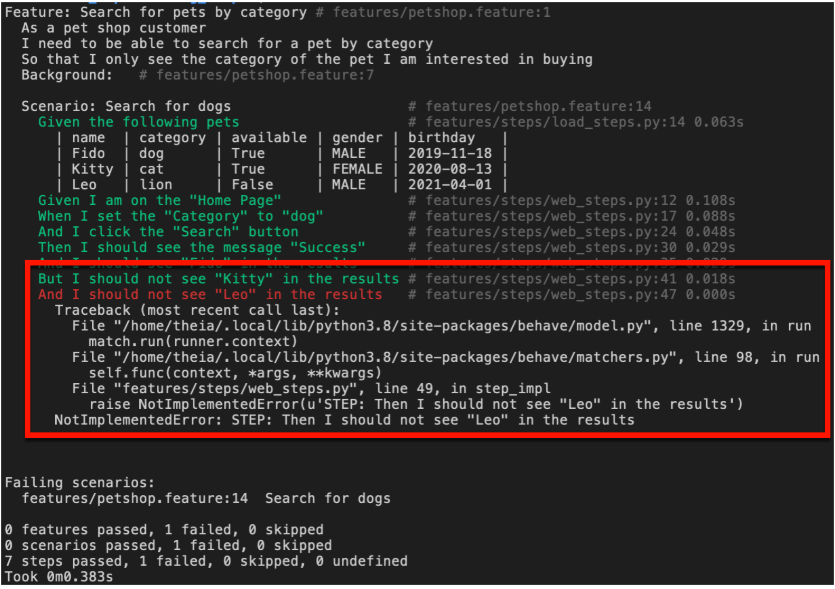

Let's go implement the last red step.

# Step 7: And I should not see Leo in the results

The next step that is red is **And I should not see “Leo” in the results**. If you look in the `web_steps.py` file you will see that it currently looks like this:

```
@then('I should not see "Leo" in the results')
def step_impl(context):
    raise NotImplementedError(u'STEP: Then I should not see "Leo" in the results')
```

Notice that this step is very similar to the previous step. In a future lab, you will learn about variable substitution and how to write a single step that will handle both of these tests but for now, you will have some duplicate code that only differs by the text that it is testing for.

## Background

Here is some important background information that will help you implement the solution:

The website under test writes all of the search results into an element with an `id` of `search_results`.

As you previously saw with Selenium, one way to find elements on a web page is to address them by their `id=` attribute. The Selenium call to do this is: `find_element(By.ID)`
```
    element = context.driver.find_element(By.ID, '...element name here...')
```

To read the text of the search results element by checking the `text` attribute.
```
    element.text
```
Use this information to help you implement the step.

## Your Task

Write code that implements the following:

**Make a call to `context.driver.find_element(By.ID)` pass in `'search_results'` and store the results in a variable called `element` to represent the web element.**
```
    element = context.driver.find_element(By.ID, ... element id here ...)
```

**Use the element from the previous line, `assert` that the `text` attribute does not contain the word `"Leo"`.**
```
    assert {some value} not in {text of element}
```

**Save your work**

## Solution

```
@then('I should not see "Leo" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Leo" not in element.text
```

## Results

Run `behave`.

You should see **And I should not see “Leo” in the results** is now `green`.

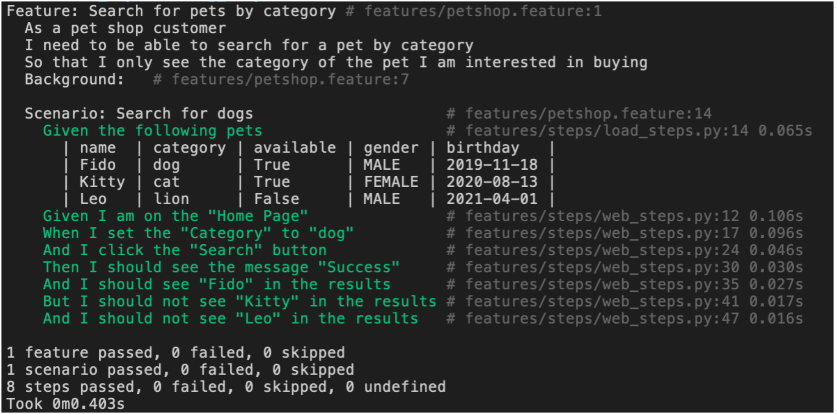

Congratulations, all of the steps have now passed.

# Conclusion

Congratulations! You just completed the **Implementing Your First Steps** lab. You now have the skills to implement the steps that are generated by the `behave` tool so that the test cases pass.

Your next challenge is to apply these techniques in your projects to create a `.feature` file that describes the behavior of your application and then generates the initial steps with `behave` and then implements those steps to make them pass following true Behavior Driven Development practices.